In [2]:
a = [1,2,3]
b = [2,3,4]
for i,j in zip(a,b):
    print(i * j)

2
6
12


In [3]:
import numpy
na = numpy.array(a)
nb = numpy.array(b)

In [4]:
na * nb

array([ 2,  6, 12])

In [8]:
import numpy as np

def threshold_function(x):
    y = x > 0
    #return y
    return y.astype(int)

x = np.array([-1,1,2])
threshold_function(x)

array([0, 1, 1])

In [9]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708])

In [10]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))


In [11]:
x = np.array([-1,1,2])
tangent_function(x)


array([-0.76159416,  0.76159416,  0.96402758])

In [12]:
np.tanh(x)



array([-0.76159416,  0.76159416,  0.96402758])

In [13]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

In [14]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
#Y = np.dot(X,W)
#Y
X.shape, W.shape

((2,), (2, 3))

In [15]:
np.dot(X,W)

array([ 5, 11, 17])

In [16]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])


In [17]:
network['w1'].shape

(2, 3)

In [18]:
network['b1'].shape

(3,)

In [19]:
network['w2'].shape

(3, 2)

In [20]:
network['b2'].shape

(2,)

In [21]:
2 * 3 + 3 + 3 * 2 + 2

17

In [22]:
x = np.array([1,0.5])

In [25]:
a = np.dot(x, network['w1']) + network['b1']

In [26]:
a

array([0.3, 0.7, 1.1])

In [28]:
z = sigmoid_function(a)
z

array([0.57444252, 0.66818777, 0.75026011])

In [29]:
y = np.dot(z, network['w2']) + network['b2']
y

array([0.51615984, 1.21402696])

In [30]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax_function(y)


array([0.33228528, 0.66771472])

## 小任務
- 如果有一個兩層神經網路，輸入層有四個神經元，隱藏層有五個神經元，輸出層有三個神經元，試問：整個網路有多少參數?

In [31]:
4 * 5 + 5 + 5 * 3 + 3

43

In [32]:
def mean_squared_err(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)


In [33]:
mean_squared_err(200, 185)

112.5

In [34]:
np.log(0)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [35]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


In [36]:
cross_entropy_err(np.array([0.3,0.7]),np.array([0.2,0.8]))

0.5261344979209353

In [37]:
def func(x):
    return x ** 2 


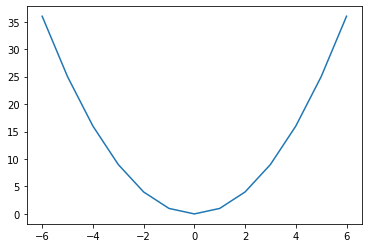

In [41]:
from matplotlib import pyplot as plt
plt.plot(np.arange(-6,7), func(np.arange(-6,7)))

In [42]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x)) / (h)


In [43]:
func(3)

9

In [44]:
dfunc(func, 3)

6.000100000012054

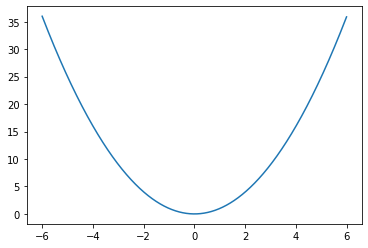

In [46]:

# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)


In [47]:
# 切線函數
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y

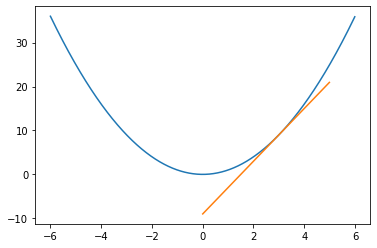

In [49]:

# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 繪製x = 3 時的切線
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)


In [50]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)
dfunc(func, 3)

6.000000000012662

In [52]:
x = 3

In [53]:
dfunc(func, 3)

6.000000000012662

In [54]:
3 - 6

-3

In [55]:
dfunc(func, -3)

-6.000000000012662

In [56]:
-3 - (-6)

3

In [57]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)


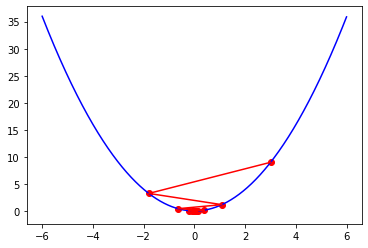

In [60]:
x = gradient_descent(func, 3, lr=0.8)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


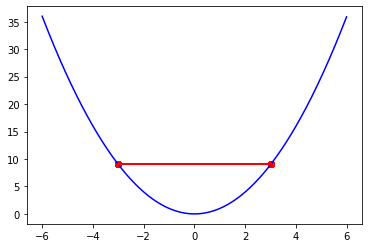

In [61]:
x = gradient_descent(func, 3, lr=1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


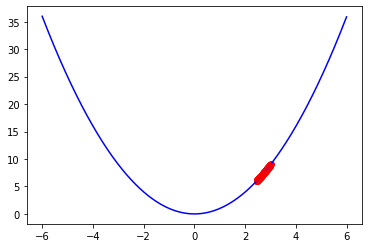

In [62]:
x = gradient_descent(func, 3, lr=0.001)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


In [63]:
x = np.array([0.6, 0.9])
np.random.seed(42)
weight   = np.random.randn(2,3)
z            = np.dot(x, weight)


In [64]:
x.shape

(2,)

In [65]:
weight.shape

(2, 3)

In [66]:
y_hat    = softmax_function(z)


In [67]:
y_hat

array([0.73222998, 0.10288817, 0.16488185])

In [69]:
y        = np.array([0, 0, 1])
y

array([0, 0, 1])

In [70]:
cross_entropy_err(y_hat, y)

1.8025260716416405

In [71]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x) # 2 X 3 zero matrix
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h) # 中央差分
        x[idx] = tmp_val
        it.iternext()   
    return grad


In [72]:
def predict(x):
    return np.dot(x, weight)


In [73]:
def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss


In [76]:
func = lambda w: loss(x, y)
dfunc(func, weight)

array([[ 0.43934502,  0.06173019, -0.50107521],
       [ 0.65901753,  0.09259528, -0.75161281]])

In [79]:
lr = 0.8
weight - dfunc(func, weight) * lr

array([[ 0.14533814, -0.18764845,  1.0485487 ],
       [ 0.99581583, -0.3082296 ,  0.36715329]])

## Batch Gradient Descent

In [151]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads


In [152]:
net = ANN(input_size=4, hidden_size=5, output_size=3)


In [153]:
print(dir(net))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'loss', 'numerical_gradient', 'params', 'predict']


In [154]:
net.params.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [155]:
net.params.get('W1').shape

(4, 5)

In [156]:
net.params.get('b1').shape

(5,)

In [157]:
net.params.get('W2').shape

(5, 3)

In [158]:
net.params.get('b2').shape

(3,)

In [159]:
from sklearn.datasets import load_iris
iris = load_iris()

In [160]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [161]:
net.predict(iris.data[0])

array([0.33587903, 0.33212427, 0.3319967 ])

In [162]:
x = iris.data

In [163]:
iris.target[0]

0

In [164]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1


In [165]:
y[0]

array([1., 0., 0.])

In [166]:
y_hat = net.predict(iris.data[0])
#y[0]

In [167]:
net.loss(iris.data[0],y[0] )

1.091004216861441

In [169]:
import time
epochs = 3000
lr     = 0.01
a = time.clock()
train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)
time.clock() - a

19.385669999999998

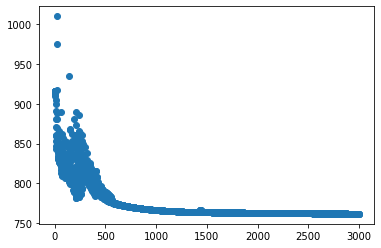

In [110]:
plt.scatter(range(3000), train_loss)

In [114]:
predicted = np.argmax(net.predict(x), axis = 1)

In [116]:
(iris.target == predicted).sum()  / len(iris.target)

0.98

In [117]:
net.params.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [118]:
net.params.get('W1')

array([[ 4.46585585, -4.74039411,  1.46939864,  0.70419637, -0.85042704],
       [ 2.95281682, -5.25982791,  4.10177463,  1.35768225, -2.65505061],
       [-6.4341614 ,  7.05347528, -3.85731464, -2.1685638 ,  4.42876787],
       [-6.63444824,  9.32775122, -4.13834916, -2.16150649,  2.15438151]])

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [120]:
accuracy_score(iris.target, predicted)

0.98

In [121]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

In [131]:
net = ANN(input_size=2, hidden_size=5, output_size=3)


In [132]:
x = iris.data[:,[2,3]]
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [133]:
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)


In [134]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [135]:

Z = numpy.argmax(net.predict(np.c_[xx.ravel(), yy.ravel()]), axis = 1)
Z = Z.reshape(xx.shape)

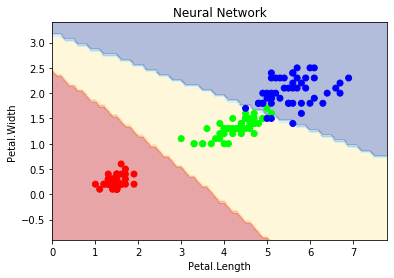

In [136]:
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.brg)
plt.title('Neural Network')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [137]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size


## Stochastic Gradient Descent

In [170]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [171]:
x = iris.data
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [172]:
iris.data.shape[0]

150

In [173]:
from numpy import random
import time
epochs      = 3000
lr               = 0.01
batch_size = 30
a = time.clock()

train_loss = []
for i in range(epochs): 
    idx = random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.numerical_gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.clock() - a


13.635694